In [3]:
import pandas as pd

In [4]:
from utils import load_data, get_similar_players_cosine, get_similar_players_knn, compare_players

2023-12-17 15:22:48.159 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [5]:
df, scaled_df, similarity_df = load_data()

2023-12-17 15:22:48.280 
  command:

    streamlit run /home/asus/anaconda3/envs/datamining/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]
2023-12-17 15:22:48.283 No runtime found, using MemoryCacheStorageManager
/home/asus/stuDYING/IT/DataScience/project/get_data/get_data.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM all_leagues',conn)


In [6]:
similar_players_cosine = get_similar_players_cosine(scaled_df, similarity_df, player_name='Lionel Messi', top_n=10)

In [7]:
similar_players_cosine

,Name,Similarity,Position,Squad
1,Papu Gomez,0.918999,"[AM, LW, FW]",Atalanta
2,Papu Gomez,0.918999,"[CM, LW, RW]",Sevilla
3,Josip Ilicic,0.861766,"[RW, AM, FW]",Atalanta
4,Houssem Aouar,0.816478,"[CM, LW, AM]",Lyon
5,Neymar,0.810167,"[LW, AM, LM]",Paris S-G
6,Luis Muriel,0.806666,"[FW, LW, AM]",Atalanta
7,Philippe Coutinho,0.797493,"[AM, LW, CM]",Barcelona
8,Rodrigo De Paul,0.795801,"[CM, DM]",Udinese
9,Angelo Fulgini,0.793830,"[AM, CM, LM]",Angers
10,Ilkay Gundogan,0.792193,"[CM, DM, FW]",Manchester City


In [8]:
#get the type of values of Position column
similar_players_cosine['Position'].values[0][0]

'AM'

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

def load_data_test():
    df = pd.read_csv('all_processed.csv')
    # df = process_data()

    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    numerical_cols = numerical_cols[numerical_cols != 'Min']

    scaler = StandardScaler()
    scaled_df = df.copy()
    scaled_df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    vector_embeddings = scaled_df[numerical_cols].values

    similarity_matrix = cosine_similarity(vector_embeddings)

    similarity_df = pd.DataFrame(similarity_matrix, index=scaled_df['Name'], columns=scaled_df['Name'])

    return df, scaled_df, similarity_df

In [10]:
from soccerplots.radar_chart import Radar
from prc import process_data
import ast

In [11]:
stats_to_compare = {'FW': ['Gls', 'xG', 'xA', 'SCA', 'Sh', 'PassProg', 'AttPen', 'KP', 'PPA', 'Succ%', 'CPA', 'TacklesAtt3rd', 'Press'],
                    'WB': ['CrsPA', 'xA', 'SCA', 'PassAtt', 'Cmp%', 'PassProg', 'ProgCarries', 'Succ%', 'Tkl', 'TklW', 'Int', 'Blocks', 'Clr'],
                    'RB': ['CrsPA', 'xA', 'SCA', 'PassAtt', 'Cmp%', 'PassProg', 'ProgCarries', 'Succ%', 'Tkl', 'TklW', 'Int', 'Blocks', 'Clr'],
                    'LB': ['CrsPA', 'xA', 'SCA', 'PassAtt', 'Cmp%', 'PassProg', 'ProgCarries', 'Succ%', 'Tkl', 'TklW', 'Int', 'Blocks', 'Clr'],
                    'CB': ['PassAtt', 'Cmp%', 'PassProg', 'ProgCarries', 'Cmp%.3', 'Tkl', 'TklW', 'Int', 'Blocks', 'Clr'],
                    'DM': ['PassAtt', 'Cmp%', 'PassProg', 'PassFinThird', 'KP', 'ProgCarries', 'Tkl', 'TklW', 'Int', 'Blocks', 'Clr'],
                    'CM': ['npxG', 'xA', 'SCA', 'Sh', 'PassAtt', 'Cmp%', 'PassProg', 'PassFinThird', 'KP', 'ProgCarries', 'Succ%', 'CPA', 'Int', 'TklW', 'Blocks', 'TacklesMid3rd'],
                    'AM': ['Gls', 'xG', 'xA', 'SCA', 'Sh', 'PassAtt', 'Cmp%', 'PassProg', 'KP', 'ProgCarries', 'PPA', 'Succ%', 'CPA', 'AttPen', 'TacklesAtt3rd', 'Press'],
                    'LM': ['Gls', 'xG', 'xA', 'SCA', 'Sh', 'CrsPA', 'PassAtt', 'Cmp%', 'KP', 'ProgCarries', 'PPA', 'Succ%', 'CPA', 'Att', 'TacklesAtt3rd', 'Press'],
                    'RM': ['Gls', 'xG', 'xA', 'SCA', 'Sh', 'CrsPA', 'PassAtt', 'Cmp%', 'KP', 'ProgCarries', 'PPA', 'Succ%', 'CPA', 'Att', 'TacklesAtt3rd', 'Press'],
                    'RW': ['Gls', 'xG', 'xA', 'SCA', 'Sh', 'CrsPA', 'PassAtt', 'Cmp%', 'KP', 'ProgCarries', 'PPA', 'Succ%', 'CPA', 'Att', 'TacklesAtt3rd', 'Press'],
                    'LW': ['Gls', 'xG', 'xA', 'SCA', 'Sh', 'CrsPA', 'PassAtt', 'Cmp%', 'KP', 'ProgCarries', 'PPA', 'Succ%', 'CPA', 'Att', 'TacklesAtt3rd', 'Press']}

def compare_players(df, player1, player2):
    position = df[df['Name'] == player1]['Pos'].values[0][0]

    if position not in stats_to_compare:
        print(f"Position '{position}' is not available for comparison.")
        return None

    value1 = df[df['Name'] == player1][stats_to_compare[position]].values
    value2 = df[df['Name'] == player2][stats_to_compare[position]].values

    values = [value1[0], value2[0]]

    ranges = []
    for col in stats_to_compare[position]:
        # ranges.append([df[col].min(), df[col].max()])
        #only get the min and max stats of the players has the same first position as the player1
        ranges.append([df[df['Pos'].str[0] == position][col].min(), df[df['Pos'].str[0] == position][col].max()])

    title = dict(
        title_name=player1 + ' - ' + position,
        title_color='#B6282F',
        subtitle_name=df[df['Name'] == player1]['Squad'].values[0],
        subtitle_color='#B6282F',
        title_name_2=player2 + ' - ' + position,
        title_color_2='#344D94',
        subtitle_name_2=df[df['Name'] == player2]['Squad'].values[0],
        subtitle_color_2='#344D94',
        title_fontsize=18,
        subtitle_fontsize=15,
    )

    radar = Radar()

    fig, ax = radar.plot_radar(ranges=ranges, params=stats_to_compare[position], values=values, 
                            radar_color=['#B6282F', '#344D94'], 
                            title=title,
                            compare=True)

    return fig

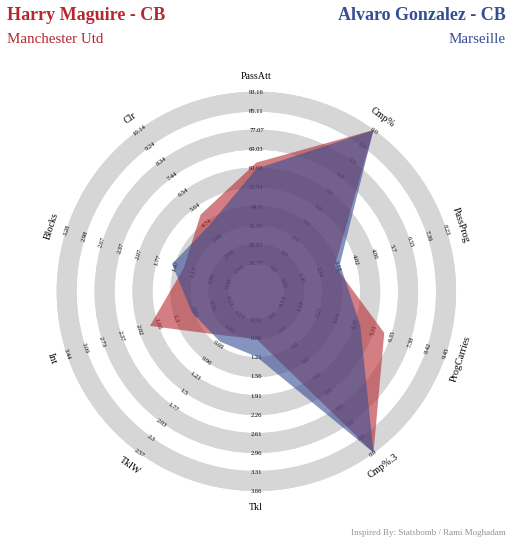

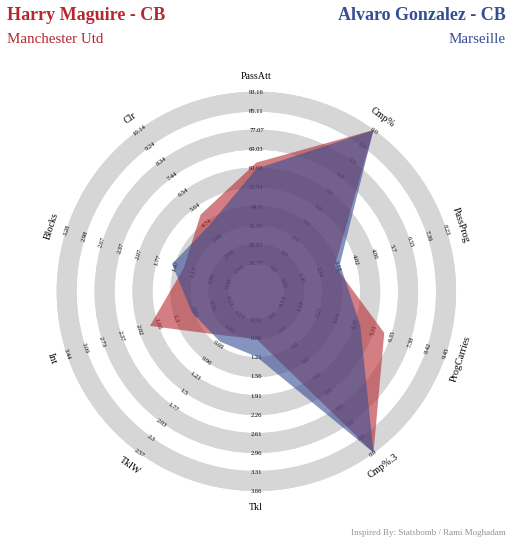

In [12]:
compare_players(df, 'Harry Maguire', 'Alvaro Gonzalez')

In [13]:
df

,player_id,Name,Squad,Min,Pos,#Pl,Ast,Att,Att.1,Att.2,Att.3,AttPen,BlockSh,Blocks,CPA,Carries,CarriesFinThird,Clr,Cmp,Cmp.1,Cmp.2,Cmp.3,CrdR,CrdY,CrsPA,Def Pen,DefGoal,DefShot,Dis,DribContest,DribGoal,DribShot,DribTackled,Err,Fld,FldGoal,GCA,Gls,Int,KP,Live,Megs,Mis,PK,PKatt,PPA,Pass,PassAtt,PassDeadGoal,PassDeadShot,PassFinThird,PassLiveGoal,PassLiveShot,PassPrgDist,PassProg,PassTotDist,Past,Press,PressAtt3rd,PressDef3rd,PressMid3rd,PrgDist,ProgCarries,ProgPassRec,Rec,SCA,Sh,ShGoal,ShLSh,ShSv,SoT,Succ,SuccPress,TacklesAtt3rd,TacklesDef3rd,TacklesMid3rd,Targ,Tkl,Tkl+Int,TklW,TotDist,TouchAtt3rd,TouchDef3rd,TouchMid3rd,Touches,npxG,xA,xG,Cmp%,Cmp%.1,Cmp%.2,Cmp%.3,DribTackled%,SuccPress%,Succ%,Rec%
0,e6adb385a0d7c823cf886437eeb23046,Aaron Connolly,Brighton,791.0,"[FW, LW, WB]",0.0,0.113780,1.137800,0.0,0.0,0.0,4.323641,0.113780,1.024020,0.455120,14.108723,0.910240,0.113780,8.988622,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.706700,0.568900,0.000000,0.341340,0.113780,0.000000,0.227560,0.000000,0.113780,0.227560,0.000000,0.568900,21.731985,0.000000,3.299621,0.000000,0.000000,0.113780,0.910240,11.491783,0.000000,0.000000,0.227560,0.113780,0.796460,18.773704,0.341340,130.505689,0.455120,14.108723,6.713021,0.796460,6.599241,44.032870,1.934260,7.509482,16.270544,1.365360,2.616941,0.000000,0.000000,0.000000,0.910240,0.910240,4.551201,0.113780,0.227560,0.455120,40.619469,0.796460,0.0,0.568900,74.525917,13.198483,1.592920,9.557522,22.869785,0.409608,0.011378,0.409608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b0050f8465a014f45bfb9db9868fd9d0,Aaron Cresswell,West Ham,3170.0,"[LB, CB]",0.0,0.227129,0.425868,0.0,0.0,0.0,0.511041,0.397476,1.362776,0.085174,35.943218,1.135647,2.810726,43.750789,0.0,0.0,0.0,0.000000,0.085174,0.482650,0.0,0.000000,0.000000,0.255521,0.965300,0.000000,0.028391,0.397476,0.000000,0.056782,0.028391,0.397476,0.000000,1.022082,1.703470,52.835962,0.056782,0.198738,0.000000,0.000000,0.681388,0.965300,58.485804,0.170347,1.164038,4.230284,0.141956,1.362776,419.167192,3.406940,876.832808,0.567823,6.529968,0.511041,3.463722,2.555205,74.299685,2.753943,0.851735,37.419558,2.725552,0.539432,0.056782,0.113565,0.000000,0.113565,0.170347,1.902208,0.056782,0.425868,0.397476,38.782334,0.880126,0.0,0.369085,152.943218,16.864353,21.776025,29.895899,65.498423,0.028391,0.161830,0.028391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ecb6284980af030d92a131f88c2ec121,Aaron Hickey,Bologna,758.0,"[LB, WB, FW]",0.0,0.000000,1.781003,0.0,0.0,0.0,1.187335,0.237467,2.018470,0.237467,38.232190,2.137203,1.781003,40.250660,0.0,0.0,0.0,0.118734,0.356201,0.118734,0.0,0.000000,0.000000,1.543536,2.018470,0.000000,0.000000,0.712401,0.000000,0.000000,0.000000,0.118734,0.000000,1.424802,0.474934,50.699208,0.000000,1.187335,0.000000,0.000000,0.474934,1.781003,47.968338,0.000000,0.118734,2.849604,0.118734,0.712401,234.736148,2.849604,724.274406,1.306069,11.160950,1.781003,5.343008,4.036939,113.034301,4.036939,1.899736,33.245383,0.831135,0.356201,0.000000,0.000000,0.000000,0.118734,0.949868,3.918206,0.118734,1.187335,0.237467,35.738786,1.543536,0.0,0.712401,229.274406,16.503958,18.997361,29.327177,59.960422,0.011873,0.035620,0.011873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c3a9b84dd52f619a84b7b5c6f8bd464c,Aaron Leya Iseka,Metz,1008.0,"[FW, AM]",0.0,0.000000,2.053571,0.0,0.0,0.0,3.125000,0.267857,0.535714,0.892857,18.303571,1.071429,0.357143,13.482143,0.0,0.0,0.0,0.000000,0.357143,0.000000,0.0,0.000000,0.000000,1.785714,0.892857,0.089286,0.267857,0.267857,0.000000,0.357143,0.000000,0.089286,0.357143,0.178571,1.071429,27.500000,0.000000,2.857143,0.178571,0.267857,0.267857,0.267857,17.767857,0.000000,0.000000,0.892857,0.000000,1.250000,30.357143,0.803571,202.589286,0.625000,10.803571,5.446429,0.357143,5.000000,38.392857,2.678571,5.535714,22.500000,1.875000,1.607143,0.000000,0.000000,0.000000,0.535714,1.250000,2.321429,0.267857,0.267857,0.267857,48.482143,0.803571,0.0,0.446429,75.803571,11.517857,2.946429,16.071429,28.482143,0.214286,0.062500,0.428571,0.0,0.0,0.0,0.0,

write a function take in a player's name as an argument. this function return the percentile of all the numeric stats of the input player, except for 'Min', compare to every other players that has 1 of their 3 positions is the same as the first position of the input player

In [14]:
import pandas as pd
import numpy as np

def player_percentiles(player_name, df):
    # Filter DataFrame for the given player's name
    player_row = df[df['Name'] == player_name]
    
    if player_row.empty:
        print(f"Player '{player_name}' not found in the DataFrame.")
        return None

    # Get the player's position
    player_position = player_row['Pos'].values[0][0]

    # filter dataframe for players has the player_position in their Pos column
    same_position_players = df[df['Pos'].apply(lambda x: player_position in x)]

    # Exclude 'Min' column from numeric stats
    numeric_columns = [col for col in df.columns if df[col].dtype == 'float64' and col != 'Min']

    # Calculate percentiles for each numeric stat
    percentiles = {}
    for col in numeric_columns:
        player_stat = player_row[col].values[0]
        position_stats = same_position_players[col].dropna()  # Exclude NaN values
        
        if position_stats.empty:
            print(f"No players found in the same position as '{player_name}'.")
            return None
        
        percentile = np.percentile(position_stats, np.sum(position_stats < player_stat) / len(position_stats) * 100)
        percentiles[col] = percentile

    return percentiles


percentiles = player_percentiles("Robert Lewandowski", df)
print(percentiles)

{'#Pl': 0.0, 'Ast': 0.2541018311321242, 'Att': 1.6473860374797626, 'Att.1': 0.0, 'Att.2': 0.0, 'Att.3': 0.0, 'AttPen': 8.589900482769137, 'BlockSh': 0.07297679768927595, 'Blocks': 0.3295285970603252, 'CPA': 0.8784473037128449, 'Carries': 25.13856887913705, 'CarriesFinThird': 1.059022109970566, 'Clr': 0.2926453933860883, 'Cmp': 19.84626921245255, 'Cmp.1': 0.0, 'Cmp.2': 0.0, 'Cmp.3': 0.0, 'CrdR': 0.0, 'CrdY': 0.14577656813799353, 'CrsPA': 0.146048813996872, 'Def Pen': 0.0, 'DefGoal': 0.0, 'DefShot': 0.036500340710156516, 'Dis': 1.9022250764441637, 'DribContest': 0.5124921882625262, 'DribGoal': 0.10940143128742708, 'DribShot': 0.1827126311717443, 'DribTackled': 0.1463365587231545, 'Err': 0.0, 'Fld': 0.18299448472700572, 'FldGoal': 0.0719661241102991, 'GCA': 0.6588051032530793, 'Gls': 1.379061883605068, 'Int': 0.25625612448714247, 'KP': 1.0975641159313891, 'Live': 37.05120659053215, 'Megs': 0.036473646574591435, 'Mis': 2.4881427674043093, 'PK': 0.2891083340078279, 'PKatt': 0.32211770858240

In [15]:
player_name = 'Robert Lewandowski'

player_row = df[df['Name'] == player_name]
player_position = player_row['Pos'].values[0][0]
same_position_players = df[df['Pos'].apply(lambda x: player_position in x)]

numeric_columns = [col for col in df.columns if df[col].dtype == 'float64' and col != 'Min']

percentiles = {}
for col in numeric_columns:
    player_stat = player_row[col].values[0]
    position_stats = same_position_players[col].dropna()  # Exclude NaN values
    
    if position_stats.empty:
        print(f"No players found in the same position as '{player_name}'.")
    
    percentile = np.percentile(position_stats, np.sum(position_stats < player_stat) / len(position_stats) * 100)
    percentiles[col] = percentile

In [16]:
same_position_players

,player_id,Name,Squad,Min,Pos,#Pl,Ast,Att,Att.1,Att.2,Att.3,AttPen,BlockSh,Blocks,CPA,Carries,CarriesFinThird,Clr,Cmp,Cmp.1,Cmp.2,Cmp.3,CrdR,CrdY,CrsPA,Def Pen,DefGoal,DefShot,Dis,DribContest,DribGoal,DribShot,DribTackled,Err,Fld,FldGoal,GCA,Gls,Int,KP,Live,Megs,Mis,PK,PKatt,PPA,Pass,PassAtt,PassDeadGoal,PassDeadShot,PassFinThird,PassLiveGoal,PassLiveShot,PassPrgDist,PassProg,PassTotDist,Past,Press,PressAtt3rd,PressDef3rd,PressMid3rd,PrgDist,ProgCarries,ProgPassRec,Rec,SCA,Sh,ShGoal,ShLSh,ShSv,SoT,Succ,SuccPress,TacklesAtt3rd,TacklesDef3rd,TacklesMid3rd,Targ,Tkl,Tkl+Int,TklW,TotDist,TouchAtt3rd,TouchDef3rd,TouchMid3rd,Touches,npxG,xA,xG,Cmp%,Cmp%.1,Cmp%.2,Cmp%.3,DribTackled%,SuccPress%,Succ%,Rec%
0,e6adb385a0d7c823cf886437eeb23046,Aaron Connolly,Brighton,791.0,"[FW, LW, WB]",0.0,0.113780,1.137800,0.0,0.0,0.0,4.323641,0.113780,1.024020,0.455120,14.108723,0.910240,0.113780,8.988622,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.706700,0.568900,0.000000,0.341340,0.113780,0.0,0.227560,0.000000,0.113780,0.227560,0.000000,0.568900,21.731985,0.000000,3.299621,0.000000,0.000000,0.113780,0.910240,11.491783,0.000000,0.000000,0.227560,0.113780,0.796460,18.773704,0.341340,130.505689,0.455120,14.108723,6.713021,0.796460,6.599241,44.032870,1.934260,7.509482,16.270544,1.365360,2.616941,0.000000,0.000000,0.0,0.910240,0.910240,4.551201,0.113780,0.227560,0.455120,40.619469,0.796460,0.0,0.568900,74.525917,13.198483,1.592920,9.557522,22.869785,0.409608,0.011378,0.409608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ecb6284980af030d92a131f88c2ec121,Aaron Hickey,Bologna,758.0,"[LB, WB, FW]",0.0,0.000000,1.781003,0.0,0.0,0.0,1.187335,0.237467,2.018470,0.237467,38.232190,2.137203,1.781003,40.250660,0.0,0.0,0.0,0.118734,0.356201,0.118734,0.0,0.000000,0.000000,1.543536,2.018470,0.000000,0.000000,0.712401,0.0,0.000000,0.000000,0.118734,0.000000,1.424802,0.474934,50.699208,0.000000,1.187335,0.000000,0.000000,0.474934,1.781003,47.968338,0.000000,0.118734,2.849604,0.118734,0.712401,234.736148,2.849604,724.274406,1.306069,11.160950,1.781003,5.343008,4.036939,113.034301,4.036939,1.899736,33.245383,0.831135,0.356201,0.000000,0.000000,0.0,0.118734,0.949868,3.918206,0.118734,1.187335,0.237467,35.738786,1.543536,0.0,0.712401,229.274406,16.503958,18.997361,29.327177,59.960422,0.011873,0.035620,0.011873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c3a9b84dd52f619a84b7b5c6f8bd464c,Aaron Leya Iseka,Metz,1008.0,"[FW, AM]",0.0,0.000000,2.053571,0.0,0.0,0.0,3.125000,0.267857,0.535714,0.892857,18.303571,1.071429,0.357143,13.482143,0.0,0.0,0.0,0.000000,0.357143,0.000000,0.0,0.000000,0.000000,1.785714,0.892857,0.089286,0.267857,0.267857,0.0,0.357143,0.000000,0.089286,0.357143,0.178571,1.071429,27.500000,0.000000,2.857143,0.178571,0.267857,0.267857,0.267857,17.767857,0.000000,0.000000,0.892857,0.000000,1.250000,30.357143,0.803571,202.589286,0.625000,10.803571,5.446429,0.357143,5.000000,38.392857,2.678571,5.535714,22.500000,1.875000,1.607143,0.000000,0.000000,0.0,0.535714,1.250000,2.321429,0.267857,0.267857,0.267857,48.482143,0.803571,0.0,0.446429,75.803571,11.517857,2.946429,16.071429,28.482143,0.214286,0.062500,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,60f3a791358df47f263079e53eb762e4,Aaron Martin,Celta Vigo,1540.0,"[LB, WB, FW]",0.0,0.175325,1.402597,0.0,0.0,0.0,0.993506,0.233766,1.519481,0.233766,36.876623,1.577922,2.922078,40.383117,0.0,0.0,0.0,0.000000,0.058442,0.233766,0.0,0.000000,0.058442,0.642857,2.103896,0.000000,0.000000,0.759740,0.0,0.058442,0.000000,0.175325,0.000000,0.993506,0.409091,50.785714,0.000000,0.350649,0.000000,0.000000,0.525974,1.285714,50.376623,0.000000,0.000000,1.811688,0.175325,0.584416,220.967532,2.629870,689.318182,1.344156,11.629870,1.285714,4.909091,5.435065,81.876623,4.733766,2.396104,36.000000,0.759740,0.350649,0.000000,0.058442,0.0,0.058442,0.876623,2.922078,0.116883,1.051948,0.876623,40.090909,2.045455,0.0,0.701299,153.993506,15.370130,18.116883,29.629870,60.136364,0.017532,0.070130,0.017532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,835c5f0e942b1c5ca

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from features_meaning import dict_metric

In [18]:
df_temp = same_position_players.copy()

position = df[df['Name'] == player_name]['Pos'].values[0][0]
lst_cols_pr = [col for col in df.columns if df[col].dtype == 'float64' and col != 'Min']

for col in lst_cols_pr:
    df_temp[col] = df_temp[col].rank(pct=True)

df_player_pr = df_temp[(df_temp['Name'] == player_name)]

df_player_pr = df_player_pr[lst_cols_pr]

df_player_pr_t = df_player_pr.T

df_player_pr_t = df_player_pr_t.reset_index(drop=False)

df_player_pr_t.columns = ['Stats', 'PR']

dict_metrics = {k: dict_metric[k] for k in lst_cols_pr}

df_player_pr_t['Metric'] = df_player_pr_t['Stats'].map(dict_metrics)

df_player_pr_t

,Stats,PR,Metric
0,#Pl,0.500947,Number of Players Dribbled Past
1,Ast,0.867424,Assists
2,Att,0.395833,Dribbles Attempted
3,Att.1,0.500947,Passes Attempted Short
4,Att.2,0.500947,Passes Attempted Medium
...,...,...,...
86,Cmp%.3,0.500947,Pass Completion % Long
87,DribTackled%,0.500947,Percentage of times dribble tackled
88,SuccPress%,0.500947,Percentage of successful pressures
89,Succ%,0.500947,Dribble Success %


In [19]:
type_of_stats = {'Passing': ['Cmp', 'PassAtt', 'Cmp%', 'PassTotDist', 'PassPrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xA', 'KP', 'PassFinThird', 'PPA', 'CrsPA', 'PassProg'],
                 'Goal and Shot Creation': ['SCA', 'PassLiveShot', 'PassDeadShot', 'DribShot', 'ShLSh', 'Fld', 'DefShot', 'GCA', 'PassLiveGoal', 'PassDeadGoal', 'DribGoal', 'ShGoal', 'FldGoal', 'DefGoal', 'OG'],
                 'Defensive Actions': ['Tkl', 'TklW', 'TacklesDef3rd', 'TacklesMid3rd', 'TacklesAtt3rd', 'DribTackled', 'DribContest', 'DribTackled%', 'Past', 'Press', 'SuccPress', 'SuccPress%', 'PressDef3rd', 'PressMid3rd', 'PressAtt3rd', 'Blocks', 'BlockSh', 'ShSv', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err'],
                 'Possession': ['Touches', 'Def Pen', 'TouchDef3rd', 'TouchMid3rd', 'TouchAtt3rd', 'AttPen', 'Live', 'Succ', 'Att', 'Succ%', '#Pl', 'Megs', 'Carries', 'TotDist', 'PrgDist', 'ProgCarries', 'CarriesFinThird', 'CPA', 'Mis', 'Dis', 'Targ', 'Rec', 'Rec%'],
                 'Summary': ['ProgPassRec', 'Gls', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR', 'xG', 'npxG']}

In [24]:
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

# Divide the stats into 5 major types
passing_stats = type_of_stats['Passing']
goal_stats = type_of_stats['Goal and Shot Creation']
defensive_stats = type_of_stats['Defensive Actions']
possession_stats = type_of_stats['Possession']
summary_stats = type_of_stats['Summary']

# Filter the DataFrame for each major type
passing_df = df_player_pr_t[df_player_pr_t['Stats'].isin(passing_stats)]
goal_df = df_player_pr_t[df_player_pr_t['Stats'].isin(goal_stats)]
defensive_df = df_player_pr_t[df_player_pr_t['Stats'].isin(defensive_stats)]
possession_df = df_player_pr_t[df_player_pr_t['Stats'].isin(possession_stats)]
summary_df = df_player_pr_t[df_player_pr_t['Stats'].isin(summary_stats)]

# Calculate the maximum number of features among all subplots
max_features = max(len(summary_stats), len(passing_stats), len(goal_stats), len(defensive_stats), len(possession_stats))

# Calculate the width of the bars based on the maximum number of features
bar_width = 0.02

row_heights=[0.5, 0.8, 0.8, 0.7, 0.8]

# Add the subplots to the big plot with updated row_heights
fig = sp.make_subplots(rows=5, cols=1, shared_xaxes=True, vertical_spacing=0.02, subplot_titles=('Summary Stats', 'Passing Stats', 'Goal and Shot Creation Stats', 'Defensive Action Stats', 'Possession Stats'))

# Rest of the code...
# Add the subplots to the big plot
fig.add_trace(go.Bar(x=summary_df['PR'], y=summary_df['Metric'], orientation='h',
                    width=bar_width*len(summary_stats),
                    marker=dict(color=summary_df['PR'], coloraxis='coloraxis')), row=1, col=1)
fig.add_trace(go.Bar(x=passing_df['PR'], y=passing_df['Metric'], orientation='h',
                     width=bar_width*len(passing_stats),
                     marker=dict(color=passing_df['PR'], coloraxis='coloraxis')), row=2, col=1)
fig.add_trace(go.Bar(x=goal_df['PR'], y=goal_df['Metric'], orientation='h',
                     width=bar_width*len(goal_stats),
                     marker=dict(color=goal_df['PR'], coloraxis='coloraxis')), row=3, col=1)
fig.add_trace(go.Bar(x=defensive_df['PR'], y=defensive_df['Metric'], orientation='h',
                     width=bar_width*len(defensive_stats),
                     marker=dict(color=defensive_df['PR'], coloraxis='coloraxis')), row=4, col=1)
fig.add_trace(go.Bar(x=possession_df['PR'], y=possession_df['Metric'], orientation='h',
                     width=bar_width*len(possession_stats),
                     marker=dict(color=possession_df['PR'], coloraxis='coloraxis')), row=5, col=1)

# Update the layout of the big plot
fig.update_layout(barmode='group', bargap=0.30,bargroupgap=0.1, title='Player Comparison', coloraxis=dict(colorscale='RdYlGn', colorbar=dict(title='Percentile Rank')))

fig.update_yaxes(automargin='left+right')

# Show the big plot
fig.show()

In [21]:
# import plotly.subplots as sp
# import plotly.graph_objects as go

# # Create subplots with 5 rows and 1 column
# fig = sp.make_subplots(rows=5, cols=1, shared_xaxes=True, vertical_spacing=0.02, subplot_titles=('Summary Stats', 'Passing Stats', 'Goal and Shot Creation Stats', 'Defensive Action Stats', 'Possession Stats'))

# # Add the subplots to the big plot
# fig.add_trace(go.Bar(x=summary_df['PR'], y=summary_df['Metric'], orientation='h', marker=dict(color=summary_df['PR'], coloraxis='coloraxis')), row=1, col=1)
# fig.add_trace(go.Bar(x=passing_df['PR'], y=passing_df['Metric'], orientation='h', marker=dict(color=passing_df['PR'], coloraxis='coloraxis')), row=2, col=1)
# fig.add_trace(go.Bar(x=goal_df['PR'], y=goal_df['Metric'], orientation='h', marker=dict(color=goal_df['PR'], coloraxis='coloraxis')), row=3, col=1)
# fig.add_trace(go.Bar(x=defensive_df['PR'], y=defensive_df['Metric'], orientation='h', marker=dict(color=defensive_df['PR'], coloraxis='coloraxis')), row=4, col=1)
# fig.add_trace(go.Bar(x=possession_df['PR'], y=possession_df['Metric'], orientation='h', marker=dict(color=possession_df['PR'], coloraxis='coloraxis')), row=5, col=1)

# # Update the layout of the big plot
# fig.update_layout(height=4000, width=1600, title='Player Comparison', coloraxis=dict(colorscale='RdYlGn', colorbar=dict(title='Percentile Rank')))

# fig.update_yaxes(automargin='left+right')

# # Show the big plot
# fig.show()
